In [1]:
from Config import *
import pandas as pd
import numpy as np
import quantstats as qs
import os
qs.extend_pandas()

BONDS_TICKER = 'LUATTRUU'
STOCK_TICKER = 'SPTX'

                    Strategy
------------------  ----------
Start Period        1997-01-02
End Period          2024-10-25
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   508.68%
CAGR﹪              4.58%

Sharpe              0.9
Prob. Sharpe Ratio  100.0%
Sortino             1.31
Sortino/√2          0.93
Omega               1.18

Max Drawdown        -19.61%
Longest DD Days     869

Gain/Pain Ratio     0.18
Gain/Pain (1M)      1.18

Payoff Ratio        0.97
Profit Factor       1.18
Common Sense Ratio  1.2
CPC Index           0.63
Tail Ratio          1.02
Outlier Win Ratio   3.82
Outlier Loss Ratio  3.61

MTD                 -1.02%
3M                  3.93%
6M                  8.98%
YTD                 9.83%
1Y                  19.72%
3Y (ann.)           1.7%
5Y (ann.)           4.21%
10Y (ann.)          4.3%
All-time (ann.)     4.58%

Avg. Drawdown       -0.82%
Avg. Drawdown Days  19
Recovery Factor     9.61
Ulcer Index         0.04
Serenity Index      2.86


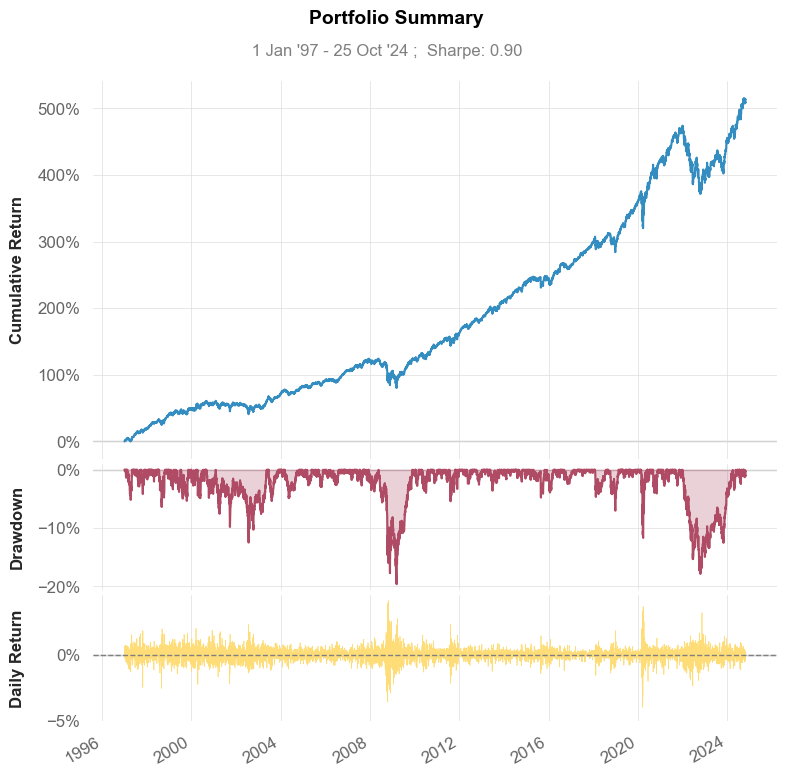

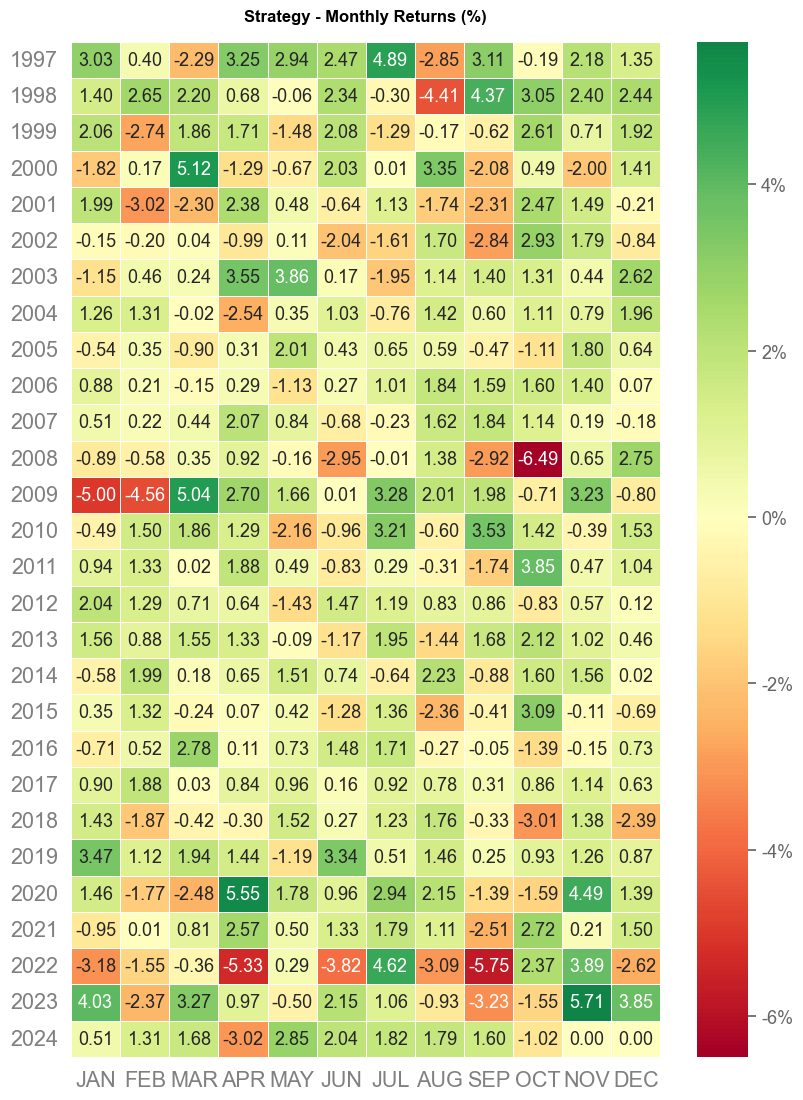

In [3]:
bond_df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, 'stock'), f'{BONDS_TICKER}.csv'), parse_dates=['Date'])
stock_df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, 'stock'), f'{STOCK_TICKER}.csv'), parse_dates=['Date'])

bond_df.sort_values('Date', inplace=True)
stock_df.sort_values('Date', inplace=True)

df = pd.merge(bond_df, stock_df, on='Date', how='inner', suffixes=('_bond', '_stock'))
df = df[['Date', 'Close_bond', 'Close_stock']]
df = df[df['Date'] >= pd.to_datetime('1997-01-01')]
df.columns = ['Date', 'Bond', 'Stock']
for col in ['Bond', 'Stock']:
    df[col+'_pctchange'] = df[col].pct_change()
    df[col+'_pctchange'] = df[col+'_pctchange'].fillna(0)
    df[col+'_pnl'] = (1+df[col+'_pctchange']).cumprod()

# classic 60/40 portfolio, No transaction cost
df['ports_pctchange'] = 0.6*df['Bond_pctchange'] + 0.4*df['Stock_pctchange']
df['ports_pnl'] = (1+df['ports_pctchange']).cumprod() 

df.set_index('Date', inplace=True)
qs.reports.basic(df['ports_pnl'])

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        1997-03-28   1997-03-28
End Period          2024-10-25   2024-10-25
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       66.0%

Cumulative Return   689.19%      506.55%
CAGR﹪              5.3%         4.61%

Sharpe              0.52         0.55
Prob. Sharpe Ratio  99.74%       99.81%
Sortino             0.75         0.77
Sortino/√2          0.53         0.55
Omega               1.12         1.12

Max Drawdown        -44.68%      -35.27%
Longest DD Days     3244         3245

Gain/Pain Ratio     0.1          0.12
Gain/Pain (1M)      0.52         0.68

Payoff Ratio        0.98         0.99
Profit Factor       1.1          1.12
Common Sense Ratio  1.11         1.16
CPC Index           0.56         0.59
Tail Ratio          1.01         1.03
Outlier Win Ratio   3.52         6.91
Outlier Loss Ratio  3.68         3.57

MTD                 4.29%        4.29%
3M          

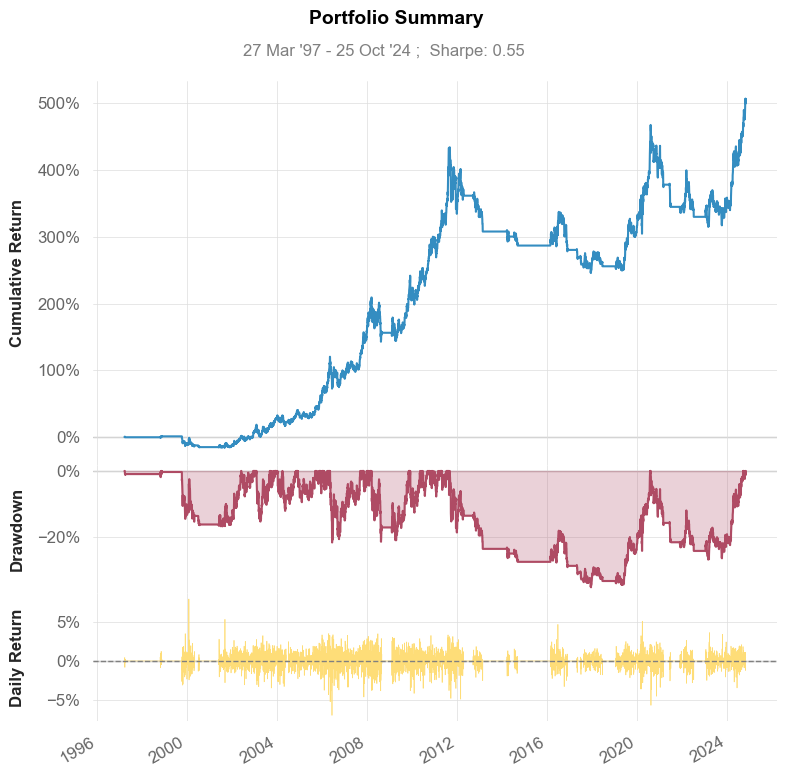

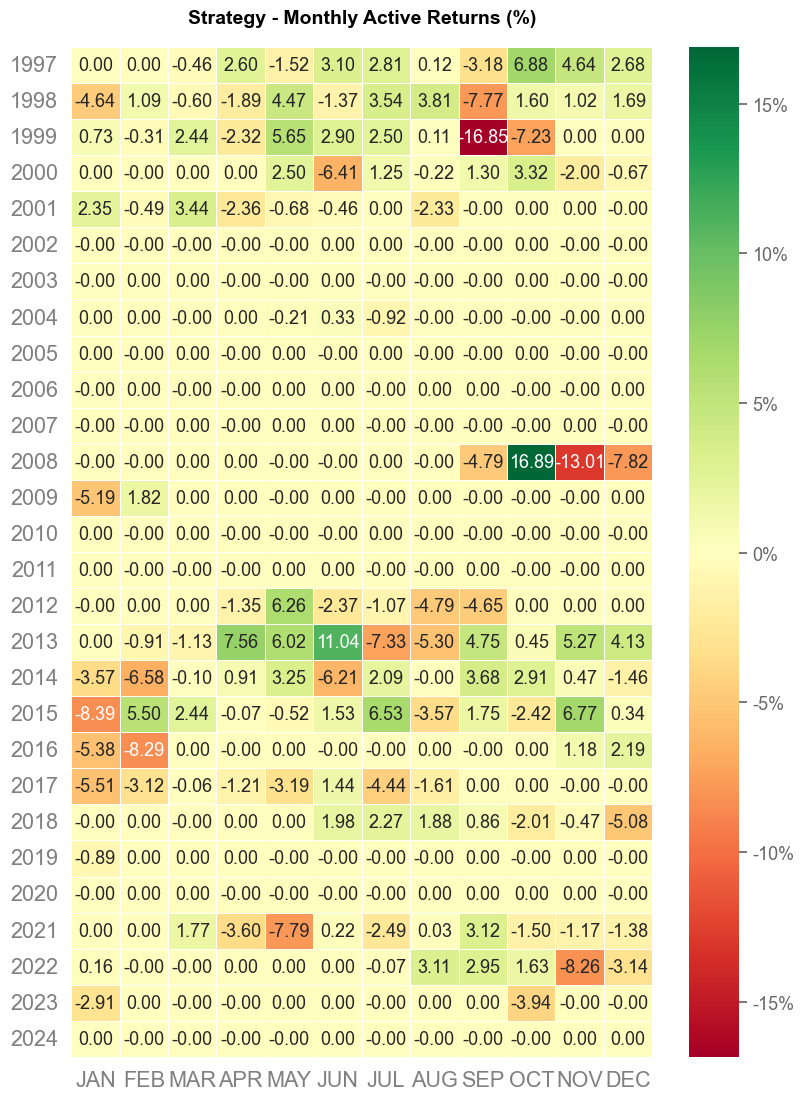

In [15]:
filepath = os.path.join(DATA_DIR, 'pnl_data', stock_name + '.csv')
df = pd.read_csv(filepath, parse_dates=['Date'])
df.set_index('Date', inplace=True)
df['close_pnl'] = (1+df['pct_change']).cumprod()
qs.reports.basic(df['equity_curve'], benchmark=df['close_pnl'])